In [1]:
import os
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
os.chdir(os.path.join(os.getcwd(), "..", "data"));

In [3]:
random_state = np.random.seed(24)

In [4]:
df = pd.read_csv("combined-season-data.csv");

In [5]:
df.head()

,season,GW,at_home,player_id,opponent_id,champion_ls,top5_ls,bottom5_ls,promoted_ts,assists_pgw,...,penalties_missed_pgw,penalties_saved_pgw,red_cards_pgw,result_pgw,saves_pgw,threat,threat_pgw,yellow_cards_pgw,total_points_pgw,total_points
0,2016,1,0,1,4,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2016,1,1,2,17,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2016,1,1,4,9,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,2
3,2016,1,0,6,13,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2016,1,1,7,20,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
df.dtypes

season                    int64
GW                        int64
at_home                   int64
player_id                 int64
opponent_id               int64
champion_ls               int64
top5_ls                   int64
bottom5_ls                int64
promoted_ts               int64
assists_pgw             float64
bonus_pgw               float64
bps_pgw                 float64
clean_sheets_pgw        float64
creativity              float64
creativity_pgw          float64
goals_conceded_pgw      float64
goals_scored_pgw        float64
ict_index               float64
ict_index_pgw           float64
influence               float64
influence_pgw           float64
minutes_pgw             float64
own_goals_pgw           float64
penalties_missed_pgw    float64
penalties_saved_pgw     float64
red_cards_pgw           float64
result_pgw              float64
saves_pgw               float64
threat                  float64
threat_pgw              float64
yellow_cards_pgw        float64
total_po

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,70052.0,2017.033447,0.876808,2016.0,2016.0,2017.0,2018.0,2019.0
GW,70052.0,19.722064,11.300622,1.0,10.0,20.0,30.0,38.0
at_home,70052.0,0.499957,0.500004,0.0,0.0,0.0,1.0,1.0
player_id,70052.0,486.281819,295.168619,1.0,239.0,476.0,698.0,1258.0
opponent_id,70052.0,12.013147,7.237893,1.0,5.0,11.0,18.0,29.0
champion_ls,70052.0,0.050277,0.218517,0.0,0.0,0.0,0.0,1.0
top5_ls,70052.0,0.250328,0.433205,0.0,0.0,0.0,1.0,1.0
bottom5_ls,70052.0,0.249429,0.432686,0.0,0.0,0.0,0.0,1.0
promoted_ts,70052.0,0.149717,0.356797,0.0,0.0,0.0,0.0,1.0
assists_pgw,70052.0,0.039299,0.210799,0.0,0.0,0.0,0.0,3.0


In [8]:
df.drop(["season", "GW"], axis=1, inplace=True)

In [9]:
X = df.loc[:, df.columns != "total_points"];
y = df.loc[:, df.columns == "total_points"];

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, 
                                                    random_state=random_state)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.30, 
                                                    random_state=random_state)

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)

X train shape:  (49036, 30)
y train shape:  (49036, 1)


In [15]:
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X test shape:  (14712, 30)
y test shape:  (14712, 1)


In [16]:
print("X val shape: ", X_val.shape)
print("y val shape: ", y_val.shape)

X val shape:  (6304, 30)
y val shape:  (6304, 1)


In [17]:
y_true = np.array(y_test["total_points"]);

In [18]:
def create_mlp(dim, dropout=0.1, l2_reg=0.01, regress=False):
    # define our MLP network
    model = Sequential()
    model.add(Dense(1024, input_dim=dim, activation="elu"))
    model.add(Dropout(dropout));
    model.add(Dense(512, activation="elu"))
    model.add(Dropout(dropout));
    model.add(Dense(256, activation="elu"))
    model.add(Dropout(dropout));
    model.add(Dense(128, activation="elu"))
    model.add(Dropout(dropout));
 
    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, activation="linear"))
 
    # return our model
    return model

In [19]:
model = create_mlp(X_train.shape[1], dropout=0.2, l2_reg=0.001, regress=True)
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt);

W0922 20:08:14.759366 4525393344 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0922 20:08:14.775459 4525393344 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0922 20:08:14.778097 4525393344 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0922 20:08:14.794332 4525393344 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0922 20:08:14.803217 4525393344 deprecati

In [20]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
                              verbose=0, mode='auto')

In [21]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=200, shuffle=True, 
          batch_size=128, callbacks=[es], verbose=1)

W0922 20:08:15.124597 4525393344 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 49036 samples, validate on 6304 samples
Epoch 1/200
49036/49036 [==============================] - 6s 129us/step - loss: 2.8100 - val_loss: 2.0009
Epoch 2/200
49036/49036 [==============================] - 6s 118us/step - loss: 2.0461 - val_loss: 1.9085
Epoch 3/200
49036/49036 [==============================] - 6s 119us/step - loss: 1.9674 - val_loss: 1.9741
Epoch 4/200
49036/49036 [==============================] - 6s 118us/step - loss: 1.9227 - val_loss: 1.7820
Epoch 5/200
49036/49036 [==============================] - 6s 117us/step - loss: 1.9048 - val_loss: 2.1070
Epoch 6/200
49036/49036 [==============================] - 6s 119us/step - loss: 1.8871 - val_loss: 1.9974
Epoch 7/200
49036/49036 [==============================] - 6s 118us/step - loss: 1.8624 - val_loss: 1.9402
Epoch 8/200
49036/49036 [==============================] - 6s 119us/step - loss: 1.8614 - val_loss: 1.9961
Epoch 9/200
49036/49036 [==============================] - 6s 118us/step - loss: 1.8502 - val_l

In [22]:
X_test_scaled = scaler.transform(X_test)

In [23]:
y_pred = model.predict(X_test_scaled)

In [24]:
pred_df = pd.DataFrame({'Actual': y_true.flatten(), 'Predicted': y_pred.flatten()})

In [25]:
pred_df.head(50)

,Actual,Predicted
0,7,9.758731
1,0,0.030633
2,0,0.126328
3,6,2.278955
4,2,3.175499
5,0,0.229868
6,0,3.317372
7,0,0.041577
8,0,0.160752
9,0,2.240067


In [26]:
test_df = pred_df.head(25)

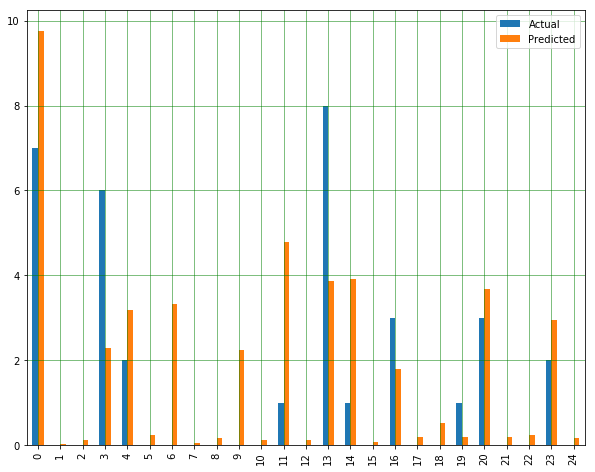

In [27]:
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

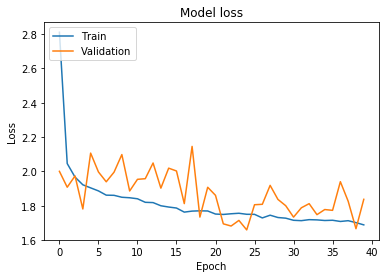

In [28]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.770998106670301
R2 score: 0.7047367674730494
Mean Squared Error: 1.8456964743716706
Root Mean Squared Error: 1.3585641222892906


In [30]:
# load and the test weekly fpl scrape
weekly_scrape = pd.read_csv("weekly-fpl-data.csv");

In [31]:
player_id_df = pd.read_csv("player_id_map.csv");

In [32]:
weekly_scrape_scaled = scaler.transform(weekly_scrape);

In [33]:
y_pred_weekly = model.predict(weekly_scrape_scaled);

In [34]:
y_pred_weekly_df = pd.DataFrame({'player_id': list(weekly_scrape["player_id"]), 'predicted': y_pred_weekly.flatten()})

In [35]:
player_names = []
for id_ in list(y_pred_weekly_df["player_id"]):
    player_names.append(player_id_df[player_id_df["player_id"] == id_]["actual_name"].iloc[0])

In [36]:
y_pred_weekly_df["player_name"] = player_names

In [37]:
y_pred_weekly_df = y_pred_weekly_df[["player_id", "player_name", "predicted"]]

In [38]:
y_pred_weekly_df.sort_values(["predicted"], ascending=False)

,player_id,player_name,predicted
8,1249,Teemu Pukki,172.050552
3,977,Issa Diop,134.167252
10,947,David Button,128.452850
4,841,Mohamed Salah,119.609428
9,858,Pierre-Emerick Aubameyang,116.956924
2,820,Lewis Dunk,113.279488
5,822,Lucas Rodrigues Moura da Silva,111.720634
1,778,Jamaal Lascelles,107.194168
11,771,Isaac Hayden,106.333977
6,555,Raheem Sterling,79.430779
